In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from tqdm import tqdm_notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, rc, animation
import matplotlib.colors
from IPython.display import HTML
from sklearn.datasets import make_moons

In [77]:
X, Y = make_moons(n_samples=100, random_state=0)

In [78]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ["Red", "yellow", "green"])

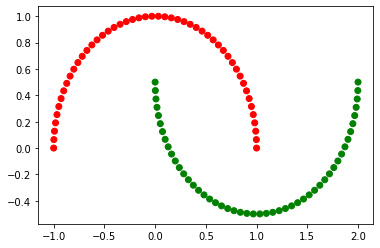

In [79]:
plt.scatter(X[:, 0], X[:, 1], cmap=my_cmap, c=Y)
plt.show()

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0, test_size=0.2)

In [81]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(80, 2) (20, 2) (80,) (20,)


In [95]:
class Sigmoid:
  def __init__(self, w, b, algo):
    self.w = w
    self.b = b
    self.algo = algo
    self.w_h = []
    self.b_h = []
    self.e_h = []
  
  def sigmoid(self, x, w = None, b = None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    return 1/ (1+np.exp(-(np.dot(x, w.T)+b)))       # (1, 2) * (2, 1) -> (1, 1)
  
  def grad_w(self, x, y, w=None, b = None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred-y) * (1-y_pred) * y_pred * x
  
  def grad_b(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred-y) * (1-y_pred) * y_pred
  
  def error_append(self, X, Y, w = None, b = None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    error = 0
    for x, y in zip(X, Y):
      y_pred = self.sigmoid(x, w, b)
      error += 0.5 * (y_pred-y)**2
    return error

  def fit(self, X, Y, epochs = 100, lr = 0.1, mini_batch_size=32, gamma = 0.9, beta = 0.9, eps = 1e-8, beta1 = 0.9, beta2 = 0.9):

    self.X = X
    self.Y = Y
    if self.algo == 'GD':
      for epoch in range(epochs):
        dw, db = 0, 0
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        m = X.shape[0]
        self.w -= lr*dw/m
        self.b -= lr*db/m
        self.append_log()
      
    elif self.algo == 'mini-batch':
      for epoch in range(epochs):
        dw, db, ponits_seen = 0, 0, 0
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
          ponits_seen += 1
          if points_seen % mini_batch_size == 0:
            self.w -= eta * dw/mini_batch_size
            self.b -= lr * db/mini_batch_size
            self.append_log()
            dw, db =0, 0
          
    elif self.algo == 'Momentum':
      v_w, v_b = 0, 0
      for epoch in range(epochs):
        dw, db = 0, 0
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        v_w = gamma*v_w + eta*dw
        v_b = gamma*v_b + eta*db
        self.w -= v_w
        self.b -= v_b
        self.append_log()
    
    elif self.algo == "NAG":
      v_w, v_b = 0, 0
      for epoch in range(epochs):
        dw, db = 0, 0
        v_w = gamma*v_w
        v_b = gamma*v_b
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y, self.w - v_w, self.b - v_b)
          db += self.grad_b(x, y, self.w - v_w, self.b - v_b)
        v_w += eta*dw
        v_b += eta*db
        self.w -= v_w
        self.b -= v_b
        self.append_log()
      
    elif self.algo == 'Adagrad':
      v_w, v_b = 0, 0
      for epoch in range(epochs):
        dw, db=0,0
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad-b(x, y)
        v_w += dw**2
        v_b += db**2
        self.w -= dw * (lr / (np.sqrt(v_w) + eps))
        self.b -= db * (lr / (np.sqrt(v_b) + eps))
        self.append_log()
    
    elif self.algo == 'RMSProp':
      v_w, v_b = 0, 0
      for epoch in range(epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        v_w = beta * v_w + (1-beta) * dw**2
        v_b = beta * v_b + (1-beta) * db**2
        self.w -= dw * (lr / (np.sqrt(v_w) + eps))
        self.b -= db * (lr / (np.sqrt(v_b) + eps))
        self.append_log()
    
    elif self.algo == "Adam":
      v_w, v_b = 0, 0
      m_w, m_b = 0, 0
      num_updates = 0
      for i in range(epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
          dw = self.grad_w(x, y)
          db = self.grad_b(x, y)
          num_updates += 1
          m_w = beta1 * m_w + (1-beta1) * dw
          m_b = beta1 * m_b + (1-beta1) * db
          v_w = beta2 * v_w + (1-beta2) * dw**2
          v_b = beta2 * v_b + (1-beta2) * db**2
          m_w_c = m_w / (1 - np.power(beta1, num_updates))
          m_b_c = m_b / (1 - np.power(beta1, num_updates))
          v_w_c = v_w / (1 - np.power(beta2, num_updates))
          v_b_c = v_b / (1 - np.power(beta2, num_updates))
          self.w -= (lr / np.sqrt(v_w_c) + eps) * m_w_c
          self.b -= (lr / np.sqrt(v_b_c) + eps) * m_b_c
          self.append_log()

  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error_append(self.X, self.Y))
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [96]:
algo = 'Adam'
w_init = np.asarray([[0.3, -0.7]])
b_init = 0
sn = Sigmoid(w_init, b_init, algo)

In [97]:
sn.fit(X_train, Y_train)

In [98]:
Y_pred_train = sn.predict(X_train)
Y_pred_train = (Y_pred_train>0.5)
Y_pred_test = sn.predict(X_test)
Y_pred_test = (Y_pred_test>0.5)
print(accuracy_score(Y_train, Y_pred_train))
print(accuracy_score(Y_test, Y_pred_test))

0.85
0.9
